In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


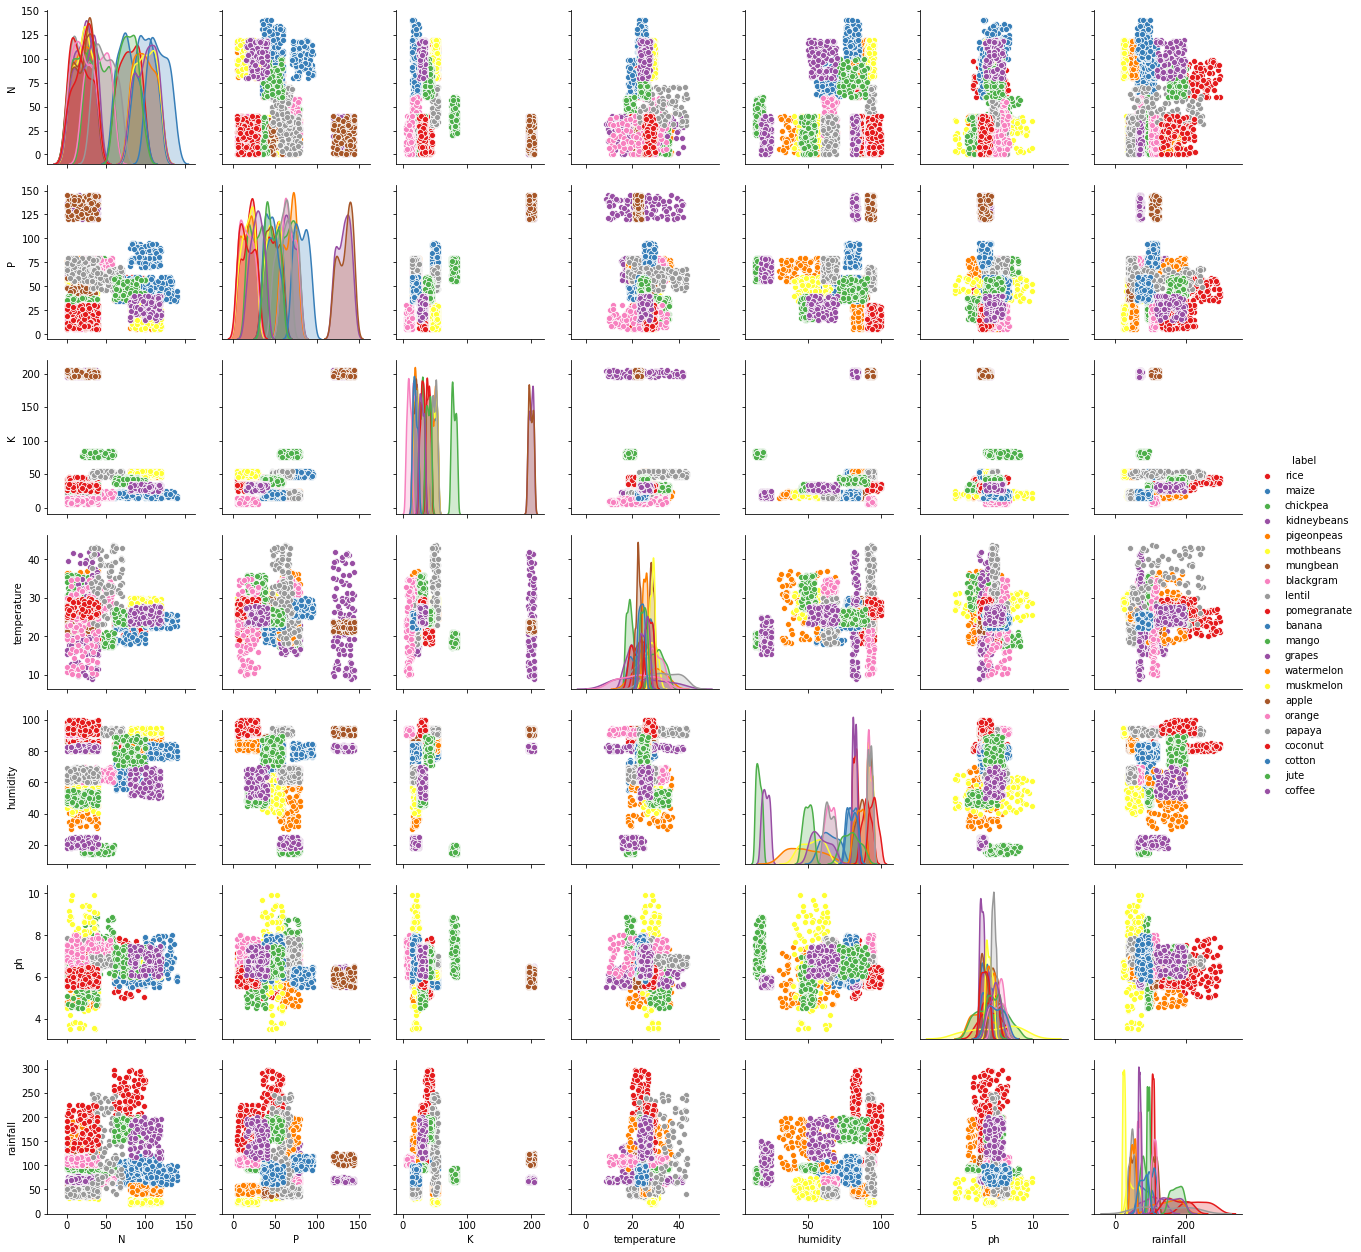

In [10]:
sns.pairplot(df,hue='label',palette='Set1')

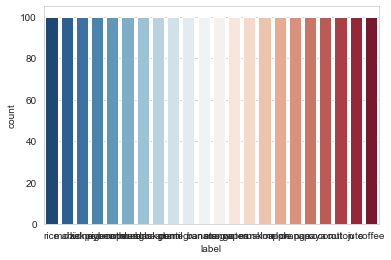

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=df,palette='RdBu_r')

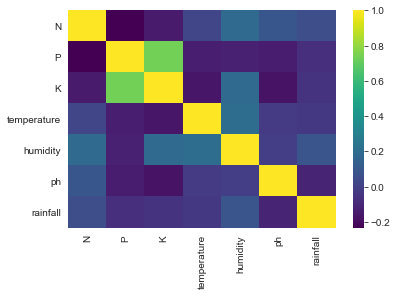

In [25]:
sns.heatmap(df.corr(),cmap='viridis')

In [6]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('label',axis=1)
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

In [14]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predictions = logmodel.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       0.90      0.96      0.93        28
   blackgram       0.79      0.79      0.79        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      0.97      0.99        35
      coffee       0.97      0.97      0.97        33
      cotton       0.86      0.94      0.90        33
      grapes       1.00      1.00      1.00        25
        jute       0.74      0.80      0.77        35
 kidneybeans       0.95      0.98      0.96        41
      lentil       0.82      0.82      0.82        28
       maize       0.96      0.81      0.88        32
       mango       1.00      1.00      1.00        34
   mothbeans       0.86      0.84      0.85        38
    mungbean       0.94      0.97      0.96        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       0.82    

In [33]:
logmodel.predict([[90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362]])

array(['rice'], dtype=object)

# Descion Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
predictions_dtree = dtree.predict(X_test)

In [46]:
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       0.91      1.00      0.95        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.82      0.94      0.88        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.97      1.00      0.98        28
       maize       1.00      1.00      1.00        32
       mango       1.00      0.97      0.99        34
   mothbeans       0.90      0.95      0.92        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [47]:
dtree.predict([[90,42,43,20.87974371,82.00274423,6.502985292000001,202.9355362]])

array(['rice'], dtype=object)

# ANN

In [19]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [25]:
X[:5]

array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
         82.00274423,   6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        ,  21.77046169,
         80.31964408,   7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        ,  23.00445915,
         82.3207629 ,   7.84020714, 263.9642476 ],
       [ 74.        ,  35.        ,  40.        ,  26.49109635,
         80.15836264,   6.9804009 , 242.8640342 ],
       [ 78.        ,  42.        ,  42.        ,  20.13017482,
         81.60487287,   7.62847289, 262.7173405 ]])

In [26]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)
X_test = np.asarray(X_test).astype(np.int)
y_test=np.asarray(y_test).astype(np.int)


ValueError: invalid literal for int() with base 10: 'blackgram'

In [309]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [5]:
model = Sequential()

model.add(Dense(units=7,activation='relu'))

model.add(Dense(units=4,activation='relu'))


model.add(Dense(units=22,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

NameError: name 'Sequential' is not defined

In [342]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=1,batch_size=32
          )

Epoch 1/50
52/52 [==============================] - 1s 10ms/step - loss: 623.6043 - val_loss: 350.9366
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 261.0157 - val_loss: 148.6934
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 106.7153 - val_loss: 67.2462
Epoch 4/50
52/52 [==============================] - 0s 6ms/step - loss: 43.7562 - val_loss: 18.4856
Epoch 5/50
52/52 [==============================] - 0s 7ms/step - loss: 8.1236 - val_loss: -2.1098
Epoch 6/50
52/52 [==============================] - 0s 7ms/step - loss: -5.1897 - val_loss: -16.0111
Epoch 7/50
52/52 [==============================] - 0s 8ms/step - loss: -23.9944 - val_loss: -67.5539
Epoch 8/50
52/52 [==============================] - 0s 6ms/step - loss: -98.7909 - val_loss: -212.4652
Epoch 9/50
52/52 [==============================] - 0s 6ms/step - loss: -275.6225 - val_loss: -513.8937
Epoch 10/50
52/52 [==============================] - 0s 4ms/step - loss: -672.6372 - 

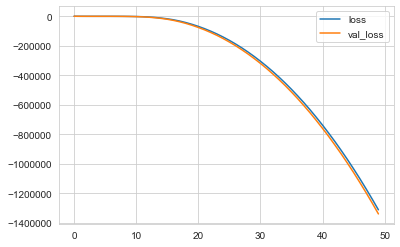

In [343]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [313]:
predictions = model.predict_classes(X_test)

C:\Users\abhis\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [344]:
from sklearn.metrics import classification_report,confusion_matrix

In [345]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.05      1.00      0.09        25
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        30
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        27
           9       0.00      0.00      0.00        26
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        38
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        30
          17       0.00      0.00      0.00        25
          18       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [346]:
model.predict([[71,54,16,22.61359953,63.69070564,5.7499144210000015,87.75953857]])

array([[1.]], dtype=float32)

# Abhijit ANN

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('Crop_recommendation.csv')
dataset.head(10) 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [85]:
dataset.columns  # konse konse columns hai

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [86]:
from collections import Counter
list1 = dataset['label']
print(Counter(list1))      # no of different labels and their counts

Counter({'rice': 100, 'maize': 100, 'chickpea': 100, 'kidneybeans': 100, 'pigeonpeas': 100, 'mothbeans': 100, 'mungbean': 100, 'blackgram': 100, 'lentil': 100, 'pomegranate': 100, 'banana': 100, 'mango': 100, 'grapes': 100, 'watermelon': 100, 'muskmelon': 100, 'apple': 100, 'orange': 100, 'papaya': 100, 'coconut': 100, 'cotton': 100, 'jute': 100, 'coffee': 100})


In [87]:
X_train[0],y_train[0]

(array([ 78.        ,  35.        ,  44.        ,  26.54348085,
         84.67353597,   7.07265562, 183.6222657 ]),
 array(['rice'], dtype=object))

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [89]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [90]:
X = dataset.iloc[:,:7].values
y = dataset.iloc[:,7:8].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0]) 

#One hot encode
from sklearn.preprocessing import OneHotEncoder          
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()     # because string cannot be converted into number...isliye one hot encoder 
print('One hot encoded array:')
print(y[0:5])

# #Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

One hot encoded array:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [91]:
X_train

array([[ 78.        ,  35.        ,  44.        , ...,  84.67353597,
          7.07265562, 183.6222657 ],
       [ 73.        ,  57.        ,  41.        , ...,  84.94375962,
          5.82470912, 272.2017204 ],
       [ 52.        ,  63.        ,  19.        , ...,  68.32176769,
          6.92889866,  67.53021213],
       ...,
       [ 35.        ,  64.        ,  15.        , ...,  63.53604453,
          6.50014496,  69.5274407 ],
       [ 39.        ,  65.        ,  23.        , ...,  69.12613376,
          7.6859593 ,  41.02682925],
       [ 14.        ,  22.        ,   9.        , ...,  91.13772765,
          6.54319181, 112.5090516 ]])

In [92]:
X_train.shape

(1980, 7)

In [93]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [96]:
y_train[99:104]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [97]:
import keras               # keras is basically called like an api of tensor flow.... koi bhi chalta hai

from keras.models import Sequential
from keras.layers import Dense

In [98]:

model = Sequential()
model.add(Dense(16, input_dim=7, activation='relu'))           # humne yaha input hi nahi liya tha
model.add(Dense(12, activation='relu'))
model.add(Dense(22, activation='softmax'))            # yaha pd.DataFrame(y_train) ka shape se pata chalega.....22 different classes hai apne pass

In [99]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('hajfd')

hajfd


In [100]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1980/1980 [==============================] - 1s 391us/step - loss: 13.3363 - acc: 0.1707
Epoch 2/100
1980/1980 [==============================] - 0s 66us/step - loss: 13.3426 - acc: 0.1717
Epoch 3/100
1980/1980 [==============================] - 0s 72us/step - loss: 13.0386 - acc: 0.1874
Epoch 4/100
1980/1980 [==============================] - 0s 75us/step - loss: 13.2825 - acc: 0.1747
Epoch 5/100
1980/1980 [==============================] - 0s 61us/step - loss: 12.9971 - acc: 0.1914
Epoch 6/100
1980/1980 [==============================] - 0s 66us/step - loss: 12.4457 - acc: 0.2237
Epoch 7/100
1980/1980 [==============================] - 0s 57us/step - loss: 12.3491 - acc: 0.2338
Epoch 8/100
1980/1980 [==============================] - 0s 48us/step - loss: 12.2732 - acc: 0.2359
Epoch 9/100
1980/1980 [==============================] - 0s 71us/step - loss: 12.3218 - acc: 0.2313
Epoch 10/100
1980/1980 [==============================] - 0s 94us/step - loss: 12.2770 - acc: 0.236

1980/1980 [==============================] - 0s 65us/step - loss: 11.9938 - acc: 0.2540
Epoch 82/100
1980/1980 [==============================] - 0s 71us/step - loss: 11.9636 - acc: 0.2551
Epoch 83/100
1980/1980 [==============================] - 0s 63us/step - loss: 11.9473 - acc: 0.2571
Epoch 84/100
1980/1980 [==============================] - 0s 48us/step - loss: 12.0015 - acc: 0.2535
Epoch 85/100
1980/1980 [==============================] - 0s 39us/step - loss: 11.9833 - acc: 0.2551
Epoch 86/100
1980/1980 [==============================] - 0s 39us/step - loss: 11.9505 - acc: 0.2556
Epoch 87/100
1980/1980 [==============================] - 0s 38us/step - loss: 11.9829 - acc: 0.2556
Epoch 88/100
1980/1980 [==============================] - 0s 52us/step - loss: 11.9806 - acc: 0.2545
Epoch 89/100
1980/1980 [==============================] - 0s 70us/step - loss: 11.9549 - acc: 0.2545
Epoch 90/100
1980/1980 [==============================] - 0s 64us/step - loss: 11.9960 - acc: 0.2535
Epo

In [121]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
print('done')

done


In [122]:
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print('done')

done


In [123]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)


Accuracy is: 23.18181818181818


In [104]:
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1980 samples, validate on 220 samples
Epoch 1/100
1980/1980 [==============================] - 0s 81us/step - loss: 11.9624 - acc: 0.2540 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 2/100
1980/1980 [==============================] - 0s 42us/step - loss: 11.9664 - acc: 0.2545 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 3/100
1980/1980 [==============================] - 0s 44us/step - loss: 11.9432 - acc: 0.2571 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 4/100
1980/1980 [==============================] - 0s 73us/step - loss: 11.9484 - acc: 0.2576 - val_loss: 12.5268 - val_acc: 0.2227
Epoch 5/100
1980/1980 [==============================] - 0s 77us/step - loss: 11.9871 - acc: 0.2551 - val_loss: 12.4815 - val_acc: 0.2227
Epoch 6/100
1980/1980 [==============================] - 0s 73us/step - loss: 12.0191 - acc: 0.2515 - val_loss: 12.6747 - val_acc: 0.2136
Epoch 7/100
1980/1980 [==============================] - 0s 85us/step - loss: 11.9413 - acc: 0.2566 - val_loss: 12.5282 - val

1980/1980 [==============================] - 0s 84us/step - loss: 11.9184 - acc: 0.2596 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 60/100
1980/1980 [==============================] - 0s 65us/step - loss: 11.8996 - acc: 0.2591 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 61/100
1980/1980 [==============================] - 0s 52us/step - loss: 11.9111 - acc: 0.2596 - val_loss: 12.4589 - val_acc: 0.2227
Epoch 62/100
1980/1980 [==============================] - 0s 52us/step - loss: 11.9592 - acc: 0.2576 - val_loss: 12.5763 - val_acc: 0.2182
Epoch 63/100
1980/1980 [==============================] - 0s 52us/step - loss: 11.9053 - acc: 0.2601 - val_loss: 12.4012 - val_acc: 0.2273
Epoch 64/100
1980/1980 [==============================] - 0s 67us/step - loss: 11.9358 - acc: 0.2581 - val_loss: 12.5282 - val_acc: 0.2227
Epoch 65/100
1980/1980 [==============================] - 0s 70us/step - loss: 11.9251 - acc: 0.2591 - val_loss: 12.4659 - val_acc: 0.2227
Epoch 66/100
1980/1980 [================

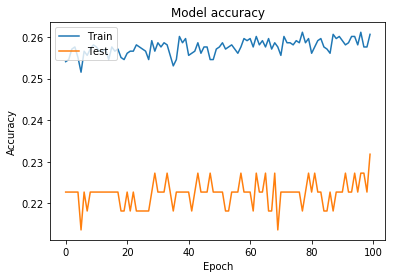

In [118]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

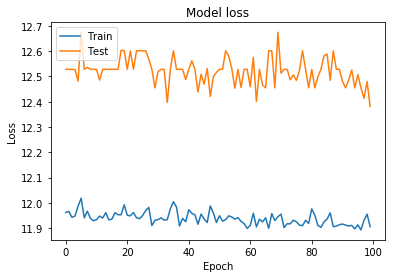

In [119]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [130]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

ValueError: Fetch argument <tf.Variable 'dense_1/kernel:0' shape=(7, 16) dtype=float32_ref> cannot be interpreted as a Tensor. (Tensor Tensor("dense_1/kernel:0", shape=(7, 16), dtype=float32_ref) is not an element of this graph.)

In [105]:
model.predict([[71,54,16,22.61359953,63.69070564,5.7499144210000015,87.75953857]])

ValueError: Error when checking input: expected dense_1_input to have shape (7,) but got array with shape (1,)

In [22]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
#X_train,X_test,y_train,y_test

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [23]:
y_test.shape

(220, 22)

In [112]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
print('done')

done


In [61]:
import numpy as np
xx=[90,	42,	43,	20.87974371	,82.00274423,	6.502985292	,202.9355362]


In [56]:
X_test[0] 

array([ 1.47520297, -1.19359172,  0.03655292,  0.11824757,  0.728101  ,
       -0.06517235, -0.79728879])

In [65]:
ans=model.predict(np.array(xx))#,ndmin=2)

ValueError: Error when checking input: expected dense_1_input to have shape (7,) but got array with shape (1,)

In [109]:
X_train[0],y_train[0]

(array([ 78.        ,  35.        ,  44.        ,  26.54348085,
         84.67353597,   7.07265562, 183.6222657 ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]))

In [107]:
model.predict(np.array(X_test[0],ndmin=2))

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.6409152e-17, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [26]:
len(ans[0])

22

In [27]:
max(ans)

array([1.6296844e-18, 2.2413722e-12, 1.8809529e-15, 4.7720071e-11,
       2.9804752e-15, 6.4184183e-13, 1.7180253e-04, 5.2245805e-13,
       7.5774813e-07, 6.3085943e-19, 3.8414189e-12, 2.6198035e-13,
       1.9354408e-08, 3.8278625e-10, 2.1562598e-15, 2.8561710e-06,
       4.0363463e-11, 1.3064343e-11, 5.4119953e-22, 2.8690854e-07,
       1.6276287e-17, 9.9982435e-01], dtype=float32)

In [28]:
j.

SyntaxError: invalid syntax (<ipython-input-28-2b4e011b28a6>, line 1)

In [29]:
max(ans[0]) 

0.99982435

In [30]:
import tensorflow as tf
print('hel')

hel


In [31]:
print('hello') b

SyntaxError: invalid syntax (<ipython-input-31-a184d56aa663>, line 1)

In [32]:
print(X_test[0],y_test[0])

[ 1.47520297 -1.19359172  0.03655292  0.11824757  0.728101   -0.06517235
 -0.79728879] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [33]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

predictions = np.argmax(y_pred, axis=-1) 

cm = confusion_matrix(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [113]:
from tensorflow.keras.models import load_model
model.save('my_model.h5')

ValueError: Fetch argument <tf.Variable 'dense_1/kernel:0' shape=(7, 16) dtype=float32_ref> cannot be interpreted as a Tensor. (Tensor Tensor("dense_1/kernel:0", shape=(7, 16), dtype=float32_ref) is not an element of this graph.)

In [114]:
model_h5=load_model('my_model.h5')
print('hell')

KeyError: "Unable to open object (object 'dense_2' doesn't exist)"

In [117]:
model_h5.predict(X_test)[0]

TypeError: Cannot interpret feed_dict key as Tensor: Tensor Tensor("Placeholder_25:0", shape=(), dtype=float32) is not an element of this graph.

In [37]:
#import path
import pathlib

In [116]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

AttributeError: module 'tensorflow._api.v1.saved_model' has no attribute 'save'

In [ ]:
tf.__version__

In [39]:


try:
    %tensorflow_version 2.x
    print('h')
except:
    print('af')
    pass

af


In [115]:
import tensorflow as tf

model = tf.keras.models.load_model('my_model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model_file(model)
tflite_model = converter.convert() 
open("converted_model.tflite", "wb").write(tflite_model)

KeyError: "Unable to open object (object 'dense_2' doesn't exist)"

In [41]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [73]:
X_train[0],y_train[0]

(array([ 0.74367294, -0.55681099, -0.08193887,  0.18315439,  0.59265485,
         0.77953652,  1.45886436]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0.]))

In [45]:
y_train[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.])